In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import re

In [2]:
data = pd.read_csv(r"C:\Users\Prince\Desktop\DataRelated\how to predict heart diseases treatment\heart_attack_dataset.csv")

In [3]:
# Initial Exploration
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


In [4]:
# Summary statistics for numerical variables
numerical_summary = data.describe()
data.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


In [5]:
# Distribution of categorical variables
categorical_distribution = {
    column: data[column].value_counts() for column in data.select_dtypes(include=['object']).columns
}

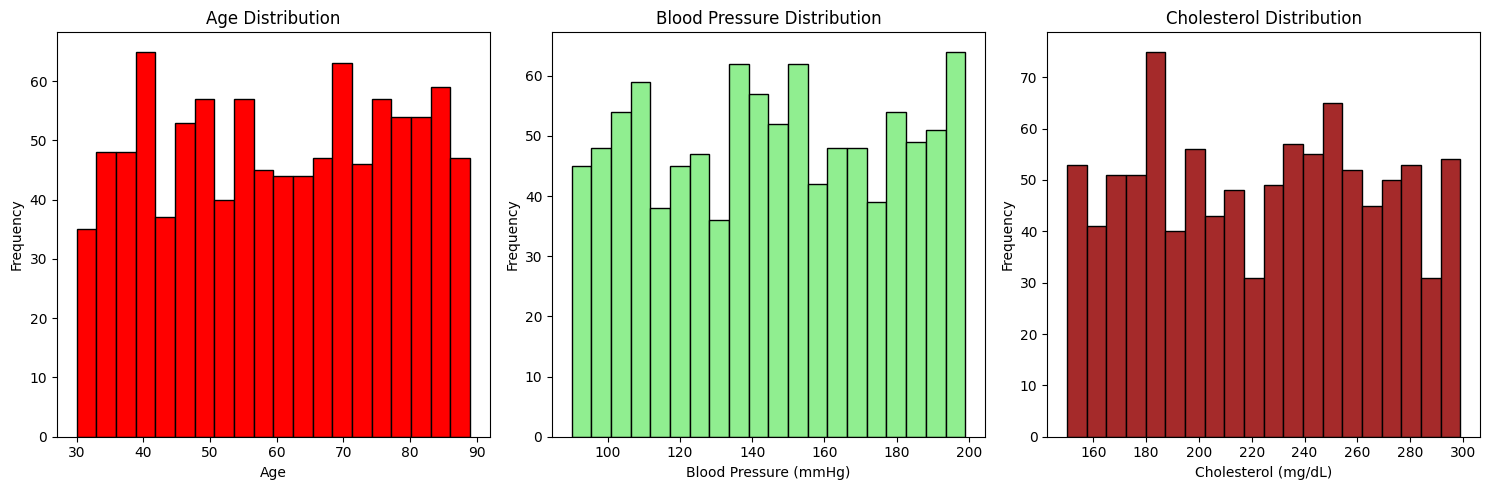

In [6]:
# Histograms for numerical variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['Age'], bins=20, color='red', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['Blood Pressure (mmHg)'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['Cholesterol (mg/dL)'], bins=20, color='brown', edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

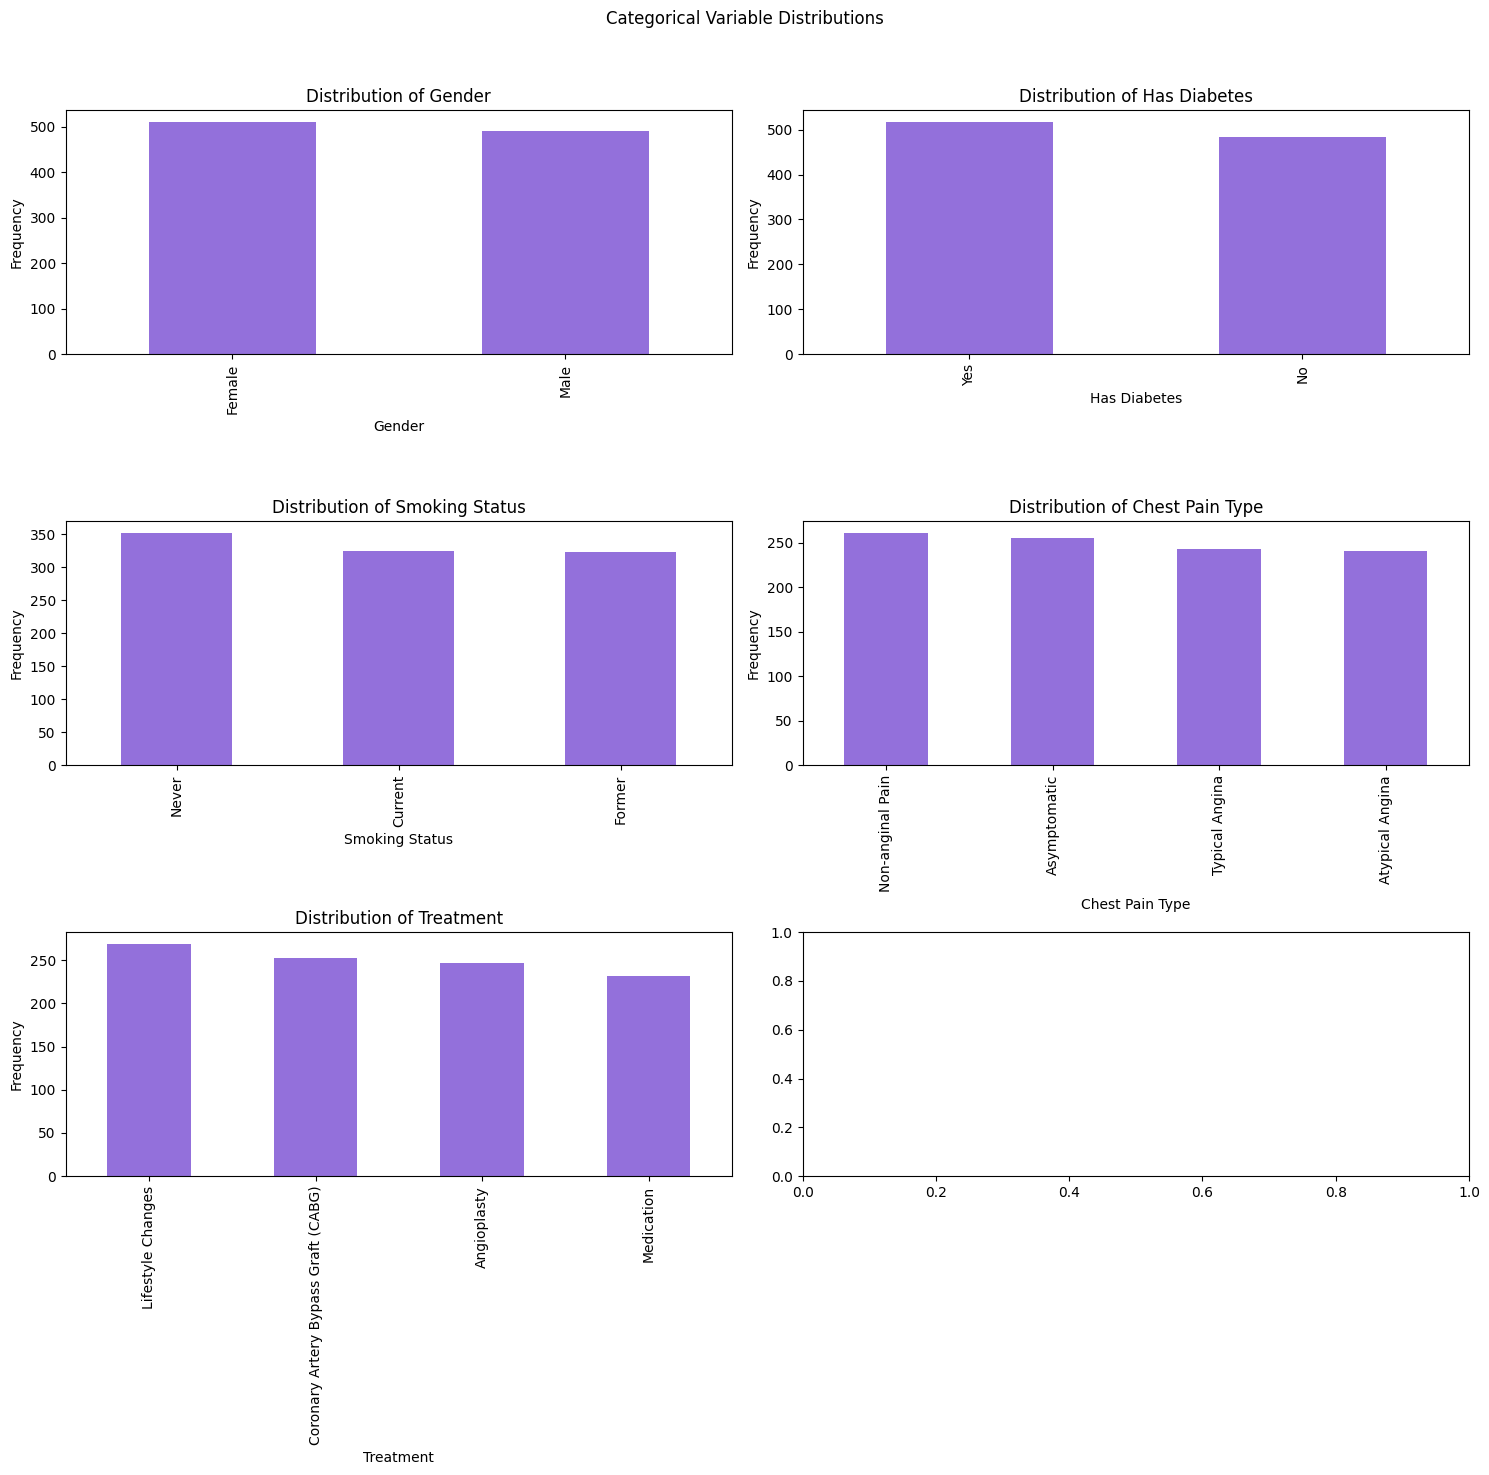

In [7]:
# Bar plots for categorical variables
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Categorical Variable Distributions')

for ax, (column, values) in zip(axes.flatten(), categorical_distribution.items()):
    values.plot(kind='bar', ax=ax, color='mediumpurple')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

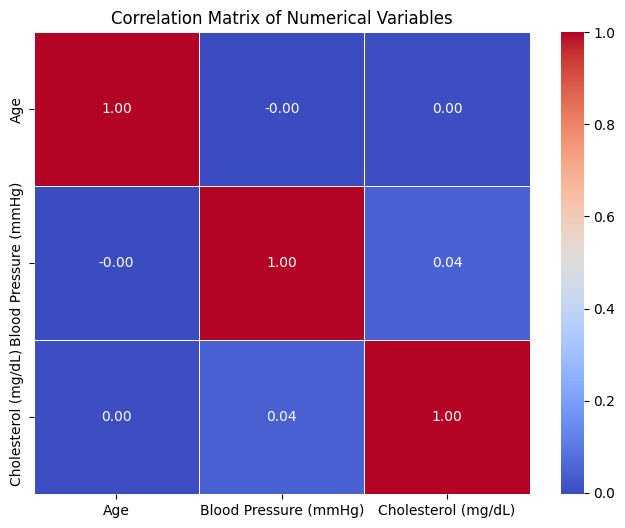

In [8]:
# Correlation analysis
correlation_matrix = data[['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [9]:
# Chi-Square Test for Independence
from scipy.stats import chi2_contingency

contingency_tables = {
    'Smoking Status vs Treatment': pd.crosstab(data['Smoking Status'], data['Treatment']),
    'Has Diabetes vs Treatment': pd.crosstab(data['Has Diabetes'], data['Treatment']),
    'Gender vs Treatment': pd.crosstab(data['Gender'], data['Treatment']),
}

chi_square_results = {}
for test_name, table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(table)
    chi_square_results[test_name] = {'Chi2 Statistic': chi2, 'p-value': p, 'Degrees of Freedom': dof, 'Expected Frequencies': expected}  

In [10]:
# Encode categorical variables
encoded_data = data.copy()
label_encoders = {}
for column in encoded_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    encoded_data[column] = label_encoders[column].fit_transform(encoded_data[column])

In [11]:
# Split the dataset into features and target
X = encoded_data.drop(columns=['Treatment'])
y = encoded_data['Treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

C:\Users\Prince\AppData\Local\Temp\ipykernel_4176\1126100797.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


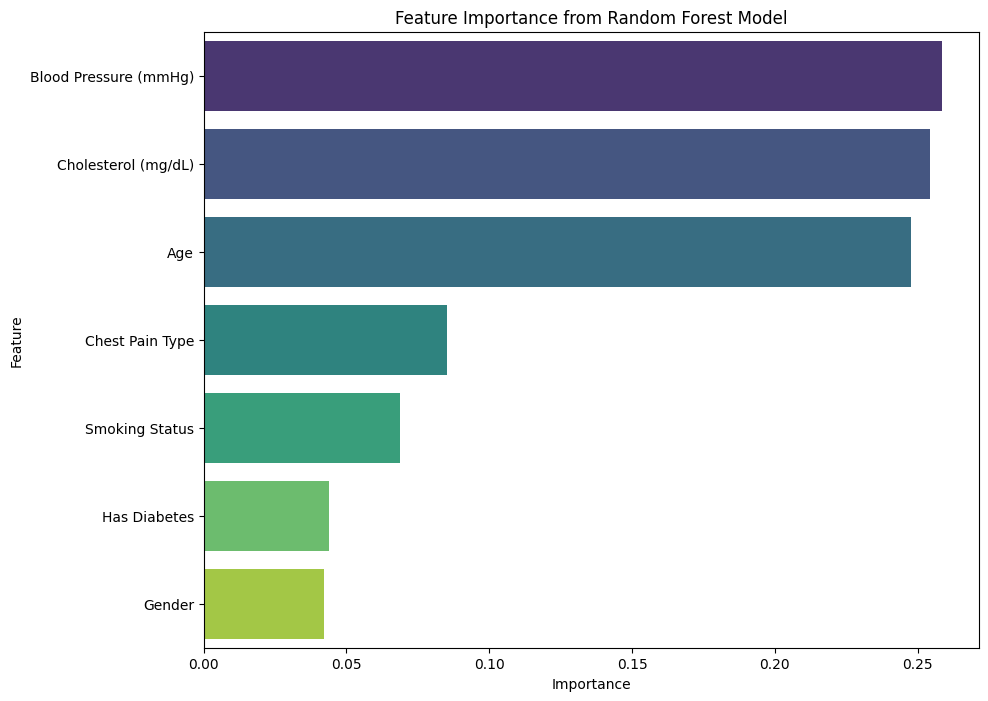

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoders['Treatment'].classes_)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')

# Feature Importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

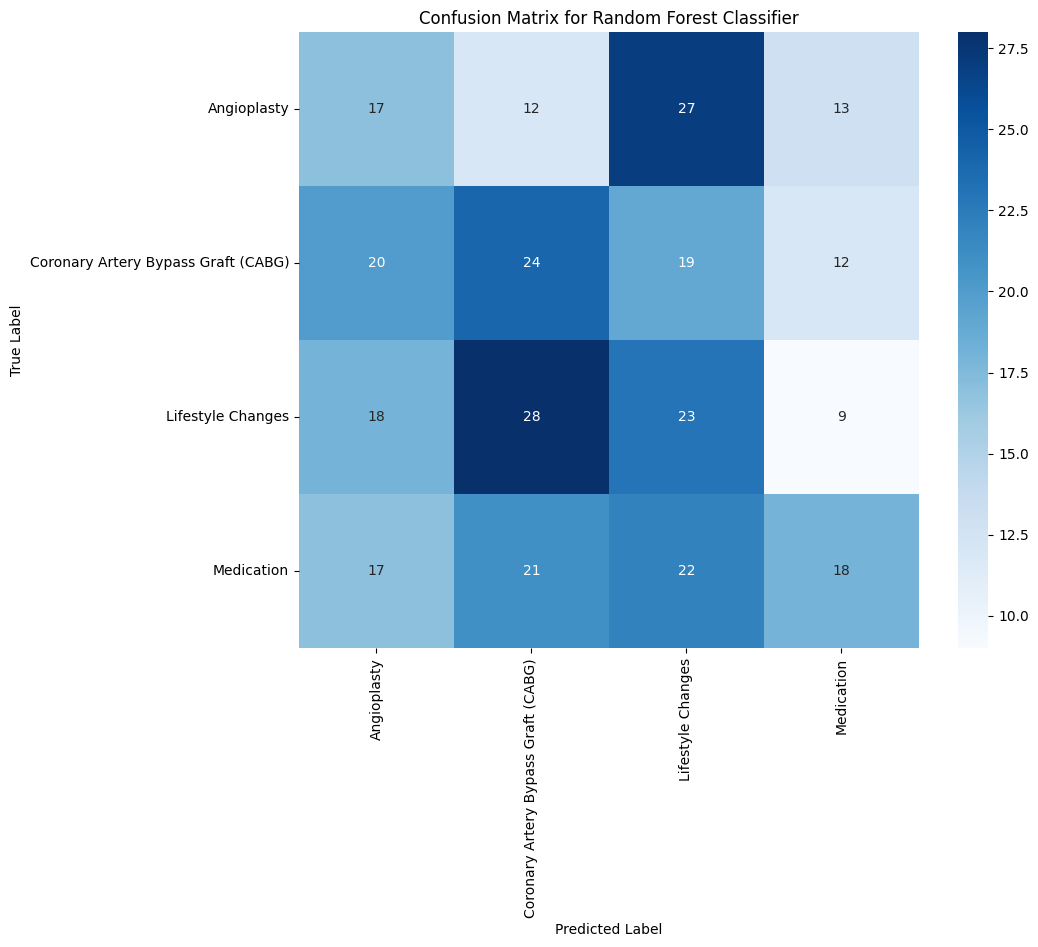

In [13]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Treatment'].classes_, yticklabels=label_encoders['Treatment'].classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


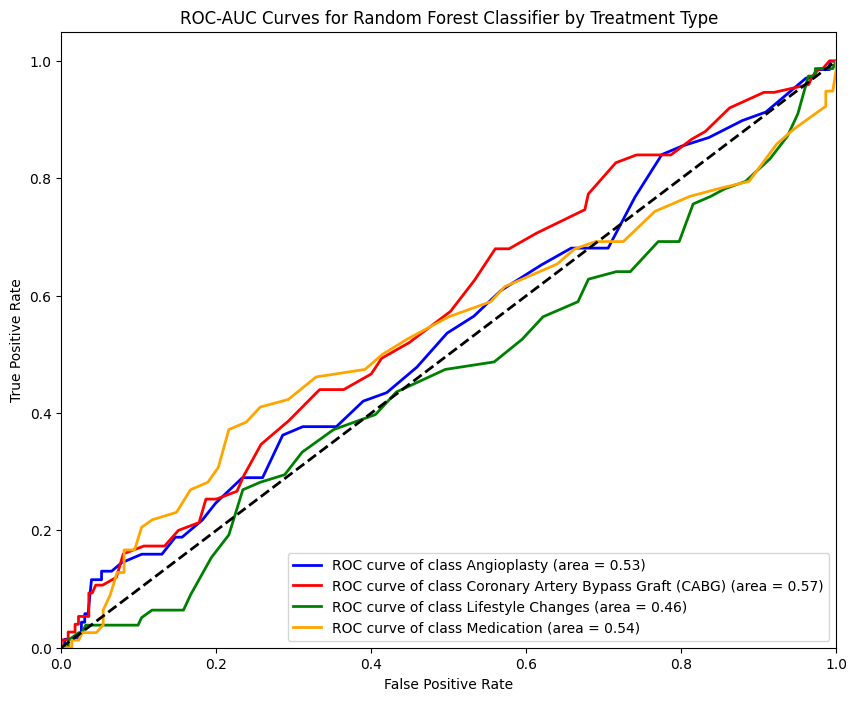

In [14]:
# ROC-AUC Curve for Random Forest
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {label_encoders["Treatment"].inverse_transform([i])[0]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Random Forest Classifier by Treatment Type')
plt.legend(loc="lower right")
plt.show()

In [15]:
# Create summary tables for Chi-Square Test, Summary Statistics, and Classification Report
chi_square_summary = pd.DataFrame({
    'Test': list(chi_square_results.keys()),
    'Chi2 Statistic': [result['Chi2 Statistic'] for result in chi_square_results.values()],
    'p-value': [result['p-value'] for result in chi_square_results.values()],
    'Degrees of Freedom': [result['Degrees of Freedom'] for result in chi_square_results.values()]
})

numerical_summary_table = numerical_summary.T.reset_index()
numerical_summary_table.columns = ['Feature', 'Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max']

rf_classification_report_lines = re.findall(r'^\s*(\S.*?\S)\s+(\d\.\d{2})\s+(\d\.\d{2})\s+(\d\.\d{2})\s+(\d+)$', classification_rep, re.MULTILINE)
rf_summary_df = pd.DataFrame(rf_classification_report_lines, columns=['Treatment Type', 'Precision', 'Recall', 'F1-Score', 'Support'])